# **COMP 2211 Exploring Artificial Intelligence**
## Lab 1 NumPy

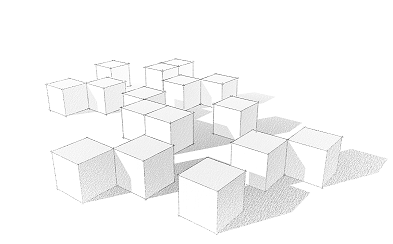

## Before We Begin

Run the code in the following cell. It will download the essential data for our use. Please do it in Google Colab since they have a better internet connection.

In [1]:
"""
    Download CIFAR10 dataset from https://www.cs.toronto.edu/~kriz/cifar.html and extract the tarball
"""
!wget 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz' -O cifar-10-python.tar.gz
!tar xf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz
"""
    Download pictures of a present
"""
!wget 'https://cdn.pixabay.com/photo/2017/11/07/19/23/santa-claus-2927962_960_720.png' -O present.png

--2022-12-10 01:35:33--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: 'cifar-10-python.tar.gz'

     0K .......... .......... .......... .......... ..........  0%  100K 27m43s
    50K .......... .......... .......... .......... ..........  0%  246K 19m29s
   100K .......... .......... .......... .......... ..........  0% 58.1M 13m0s
   150K .......... .......... .......... .......... ..........  0% 62.2M 9m46s
   200K .......... .......... .......... .......... ..........  0%  232K 10m12s
   250K .......... .......... .......... .......... ..........  0% 37.4M 8m31s
   300K .......... .......... .......... .......... ..........  0% 31.8M 7m18s
   350K .......... .......... .......... .......... ..........  0% 45.9M 6m24s
  

In [5]:
!ls cifar-10-batches-py

batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test_batch


# Pre-Task: Read the Manual

The lab session is very short, and the capability of NumPy is vast. It is impossible for us to cover everything in NumPy in such a short lab session. To master it, you have to:
1. Read the documentation
2. Write a lot
3. Write more

If there's anything unclear in the notes, you can approach us, but most of the time, it would be much quicker if you Google it yourself. There are a vast amount of resources out there on the internet. It is not a problem to copy and paste, but you need to understand why and how people write the codes.

If you search for examples and documentation, Google will always be your good friend.

## Background of Image Processing ##

A digital image is a two-dimensional grid of intensity values, represented by $I(x,y)$, where $x$ and $y$ are coordinates, and the value of $I$ at coordinates $(x,y)$ is called the intensity of the image.

*   Pixels: Short for Picture Element. A pixel is a single point (dot) in an image
*   Dimensions: The dimensions of images are specified by the width and height of the image.
> Image width is the number of columns in the image<br/>
> Image height is the number of rows in the image<br/><br/>
> 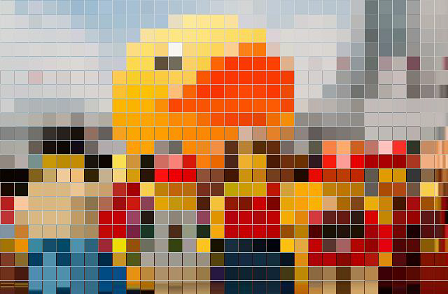 <br/>
> An image of dimensions $32\times21$ (i.e., image width = 32 pixels, image height = 21 pixels)

Color images have intensity from the darkest and lightest of 3 colors: red, green, and blue (RGB). The mixtures of these color intensities are also referred to as 24-bit color images. An 8-bit intensity range has 256 possible values, 0 to 255.

Examples:
*   Black: RGB = (0, 0, 0)
*   White: RGB = (255, 255, 255)
*   Red: RGB = (255, 0, 0)
*   Green: RGB = (0, 255, 0)
*   Blue: RGB = (0, 0, 255)
*   Yellow: RGB = (255, 255, 0)


## Task 1: Extracting Images from CIFAR10

Let's do some exercises to get familiar with these functions.

Since our course focuses on machine learning, naturally, our end goal would be to successfully train an intelligent AI at the end of the course. However, to properly train a machine in a **supervised** manner (you will learn this soon in class), we often need a large amount of training data and accurate labels (i.e., the corresponding answers, we call it a curated dataset). Let's take image classification as an example. The end goal of the task would be to build an AI that can accurately tell what is inside an image. So naturally, the input would be the image, and the output would be the answer. In this example, data and labels would refer to the input and the output of the AI model, respectively. I.e. data would be the image, and labels would answer whether the picture shows a Pikachu or Rick Astley.

While [getting the data is often easy](https://images.google.com/), labelling the images is not. Usually, we need tens of thousands, if not millions, of samples to obtain a functioning AI model. Currently, the [state-of-the-art image classification on ImageNet](https://paperswithcode.com/sota/image-classification-on-imagenet) (a famous general-purpose image dataset) is co-trained on a dataset called JFT-3B, which contains nearly 3 billion images. On this scale, it is indubitably infeasible to label images on our own. Luckily, there are plenty of large datasets online with decent label quality.

[CIFAR10](https://www.tensorflow.org/datasets/catalog/cifar10) is a very famous (relatively) small curated dataset among Computer Vision-related machine learning research. Due to its small size and good label quality, it is a very good toy example to test and prototype our models. Therefore, it would be nice to know <font color="red">how to extract images</font> from it as they have some bizarre ways to store their images.

```cifar-10-batches-py``` is a folder we just downloaded and extracted, containing training and test data of CIFAR10 as well as the corresponding labels. In this lab, we will only use a part of the training data stored in ```cifar-10-batches-py/data_batch_1```, which contains 10,000 images ($\frac{1}{5}$ of the whole training data). We already wrote some code to load the data in the following cell. And here are the variables you would need to use:

- `images` contain the raw pixels of the images
- `filenames` contain the filenames of each raw image

The first dimension of both variables is 10k, corresponding to the total number of images. And they have the same order. I.e., `images[43]` and `filenames[43]` would be raw pixel values and the file name of the 44<sup>th</sup> image.

In [5]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
with  open('./cifar-10-batches-py/data_batch_1', 'rb') as f:
    data = pickle.load(f, encoding='bytes') # data is a dictionary with keys b'data', b'filenames', b'labels', b'batch_label'
images = data[b'data'] # raw pixels of 10k images
filenames = np.array(data[b'filenames']) # filenames of the 10k images
images.shape # (10000, 3072)
print(filenames.shape)
print(filenames.dtype)

from PIL import Image
def check_all_pixels(x, y):
    """
        helper function for validating if two image are indeed the same
    """
    x = np.array(Image.open(x).convert('RGB')) # Open image, convert to 'RGB' color scheme (in case the picture isn't) and parse it to numpy ndarray
    y = np.array(Image.open(y).convert('RGB'))
    return np.all(x == y) # Return True if and only if all values in the two arrays are the same

(10000,)
|S40
[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [110 142 151 ...  60  60  62]
 [197 198 201 ...  61  63  57]
 [ 23  47  52 ... 184 183 186]]


### Task 1.1: Finding Images with Filenames

Now, using Boolean indexing, please extract the images with the name ```b'coupe_s_002178.png'```, ```b'capreolus_capreolus_s_000073.png'```, `b'leptodactylus_pentadactylus_s_000004.png'`. <font color="red">**The 'b' in front of the string cannot be ignored**</font> (For details, please search `Byte string` in Google. The dictionary entries are byte strings probably because the pickle file was saved using a C/C++ program, which uses a different format to represent strings than Python.).

In [7]:
"""
    TODO: Extract the three images from `images` where their file name is in 
    [b'coupe_s_002178.png', b'capreolus_capreolus_s_000073.png', b'leptodactylus_pentadactylus_s_000004.png'] and save to the variable ```extracted_images```.   
"""
# list of file names that we are interested in
name_list = [b'coupe_s_002178.png', b'capreolus_capreolus_s_000073.png', b'leptodactylus_pentadactylus_s_000004.png']
2
### START CODE HERE ### 
# Hint: You might use `np.logical_or` or `|` which are the same. (Please read the review section if you forgot)
# You might also want to place appropriate parathesis `()` to avoid ambiguity if you're using `|`.
selected_idx = (filenames == name_list[0]) | (filenames == name_list[1]) | (filenames == name_list[2])
### END CODE HERE ###

# use the obtained bool indices to select the images we want
extracted_images = images[selected_idx, :]
# Sanity Check
extracted_images.shape == (3, 3072) # It should have shape (3, 3072)

True

### Task 1.2: Reshape and Transpose

You have extracted raw data of the three images, and we want to plot them using libraries. However, we can't plot it directly, as our library (`matplotlib.pyplot`) expects our image to have a shape of ```(H, W, C)``` where H, W is the height and width of the images, respectively, and C represents the number of channels. In our case, `C=3` (RGB). However, our current image has the shape of `(3072, )` (more specifically, `(32*32+32*32+32*32, )`). This is because when the author of CIFAR10 saves the image, the image data is saved as `[the values of red pixels, the values of green pixels, the values of blue pixels]`. Therefore, we have to reshape (and probably some other functions) to modify the array so that each image has the shape of `(32, 32, 3)`.

TypeError: Invalid shape (3072,) for image data

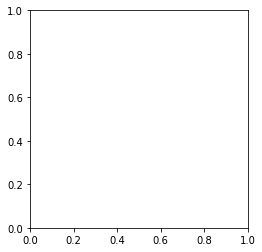

In [ ]:
plt.imshow(extracted_images[0]) # We can't plot it directly!

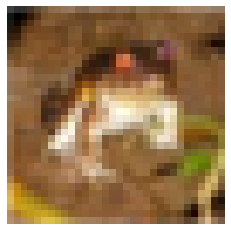

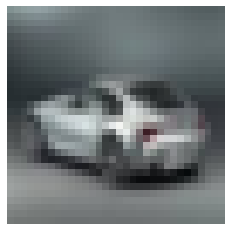

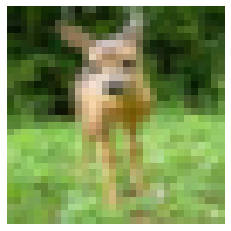

In [18]:
"""
    TODO: Reshape the array such that it is a 4D array with shape (3, 32, 32, 3) 
    and the image looks the same as the Expected Results as shown in the next cell.
    Save to the variable ```reshaped_images```.
"""
### YOUR CODE HERE ### (≈ 1 line of code)
# Hint: the original CIFAR10 image data is saved as [the values of red pixels, the values of green pixel, the values of blue pixel], 
# where each color of pixels are further saved as [the values of 1st row, the values of 2nd row, ..., the values of the last row].
# But what we want is to index the rows first, then columns, and finally the colors, i.e., each image has shape (32, 32, 3).
reshaped_images = extracted_images.reshape((3, 3, 32, 32)).transpose([0, 2, 3, 1])
### END CODE HERE ###

# This part of code is to plot and help you check if you have done the reshaping correctly.
for i, le_image in enumerate(reshaped_images):
    fig = plt.figure(frameon=False)
    plt.axis('off')
    plt.imshow(le_image)
    plt.savefig(f'./cifar_{i}_submit.png', bbox_inches='tight', pad_inches=0)

### Expected Result

You should observe these three images.

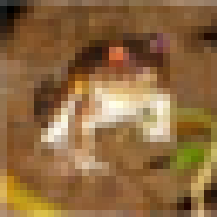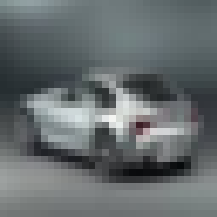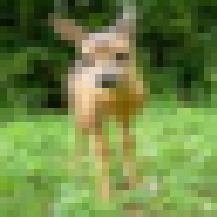

## Task 1.3 Visualization of Transpose

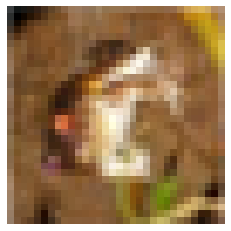

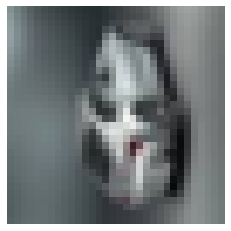

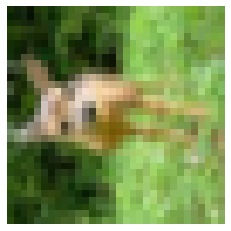

In [19]:
"""
    TODO: Now, try swapping the first and second axis of the image (or second or third axis of the 4d array), 
    how are these images compared to the original images?
    Save to the variable ```transposed_images```.
"""
### START CODE HERE ### (≈ 1 line of code)
transposed_images = reshaped_images.transpose([0, 2, 1, 3])
### END CODE HERE ###

for i, le_image in enumerate(transposed_images):
    fig = plt.figure(frameon=False)
    plt.axis('off')
    plt.imshow(le_image)
    plt.savefig(f'./cifar_{i}_t_submit.png', bbox_inches='tight', pad_inches=0)

### Expected Result

You should observe these three images.

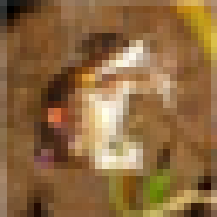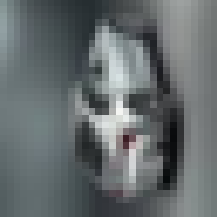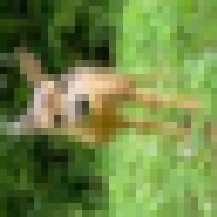

## Task 2 Image Enhancement (Image Augmentation): Contrast Adjustment

If you have fiddled with your electronic devices for a bit, you might have heard of contrast adjustment. In short, it's a way to make the	image	features stand out more clearly. In this lab, we will walk you through one of the simpler ways to adjust contrast.

First, let's talk about how an image is represented in a multi-dimensional array.

Usually, images are represented in multi-dimensional arrays with the shape either like $(H, W, C)$ or $(C, H, W)$ (Which we have shown in the previous task). And usually, an Image contains 3 channels: red, green, and blue. So, in some sense, you can think as if three images of different channels got smashed and turned into one image.

### Task 2.1: Greyscale

For the contrast adjustment, we first need to convert our image to greyscale. To do so, we would calculate the new pixel value like this:

$$
    0.299 * R + 0.587 * G + 0.114 * B
$$

, where R, G, B represent red, green, and blue values, respectively.

To practice coding in NumPy, we will ask you to use `np.dot` (or `@`) (But you can also do it on each channel individually). It does matrix multiplication (in linear algebra way instead of elementwise). The shape of the matrices would look like: `(m, n)@(n, k)=(m, k)`

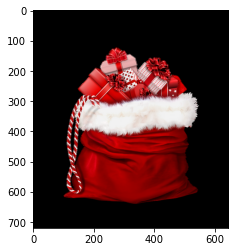

In [22]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
image = np.array(Image.open('present.png').convert('RGB'))
plt.imshow(image)

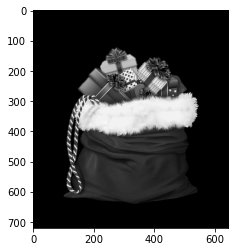

In [23]:
"""
    Save greyscaled version of the image to the variable ```grey_image``` according to the given
"""
luminance = np.array([0.299, 0.587, 0.114]) # Luminance coefficients
### START CODE HERE ### (≈ 1 line of code. Hint: Try fiddle around by looking at the shape of the arrays. The result image might or might not have 3 channels)
grey_image = image@luminance
### END CODE HERE ###
plt.imshow(grey_image, cmap='gray', vmin=0, vmax=255)

## Expected Result

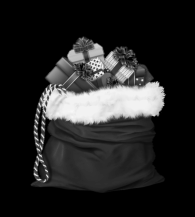

## Task 2.2 Take Ratio

Lastly, the new pixel value of the adjusted image would be:

$$
    I_{new}^{ij} = \alpha\times I_{grey}^{ij} + (1-\alpha)\times I_{ori}^{ij}
$$

where $I_{grey}$ is the greyscale image, $I_{ori}$ is the original image, $\alpha$ is a value between 0 (inclusive) and 1 (inclusive) and in this example, we take $\alpha=0.5$.

(Hint: the operations in this formula are pixel-wise, as hinted by the superscript ${}^{ij}$. You might want to reshape the greyscale image depending on how you code the previous step)

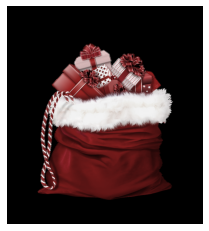

In [25]:
alpha = 0.5
### START CODE HERE ### (≈ 1 line of code)
new_image = alpha * image + (1 - alpha) * grey_image.reshape(grey_image.shape + (1,))
### END CODE HERE ###

plt.axis('off')
plt.imshow(new_image.astype(np.uint8))
plt.savefig(f'./present_submit.png', bbox_inches='tight', pad_inches=0)

## Expected Result

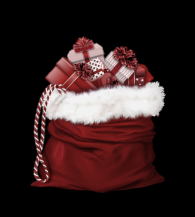

## Task 3: Familiarize with NumPy Functions: Generating and Plotting Exponential Curve

We have done reshaping and matrix arithmetic in the previous two tasks.
However, there are still tons of Numpy functions we haven't gone through or didn't talk about. So, from these tasks, instead of teaching you step by step how to do it, we hope you can start finding answers through the internet (e.g. Google). But of course, not everyone catches up quickly and knows what even to Google. In this case, don't hesitate and feel free to ask questions ;). We all got our own office hours.

In this task, we will plot a simple function, exponential curve $y=e^t$. But this time, we'll instead demonstrate an example code. We hope you can learn from it without us explaining (although there're comments) and write your own slightly simpler version. It's just like how you typically search for answers online. (So technically, now you're my machine learning model. :DDD)

We gave you the data (drawing some graph) and label (example code and image), and you take input (drawing exponential graph) and output something (code and image)) Please try your best to obtain the answers by searching on the internet.

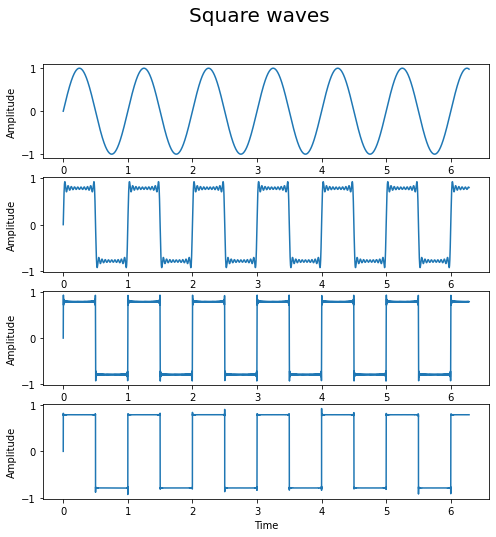

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

"""
    Demonstration of Fourier Decomposition of Square Waves
    Referenced from: https://en.wikipedia.org/wiki/Square_wave
"""

t = np.linspace(0, np.pi * 2, 10000) # Create array with 10,000 values ranging from 0 to 2*pi

fig, axs = plt.subplots(4, 1, figsize=(8,8)) # Create plot with 4 rows and 1 column. Is that really needed for plotting 1 simple exponential curve?
fig.suptitle('Square waves', fontsize=20) # Naming the figure for the fancy presentation.

for i in range(4):
    stack_of_functions = [((2 * k + 1)**-1) * np.sin(2 * np.pi * t * (2 * k + 1)) for k in range(10 ** i)] # Fourier decomposition of square waves
    stack_of_functions = np.vstack(stack_of_functions) # Turn array of 1d ndarray to 2d ndarray.

    square_wave = stack_of_functions.sum(axis=0) # Sum all sine waves
    axs[i].set(xlabel='Time', ylabel='Amplitude') # Fancy axis labeling
    axs[i].plot(t, square_wave) # Plot the graphs

fig.show() # In normal python program (i.e. not using notebook but running normal python program), you need to run this line in order to show what you have plot

By referencing the example above, please plot the curve of $y=e^t$. The domain (t-axis/x-axis) could be anything.

Text(0.5, 0, 'x')

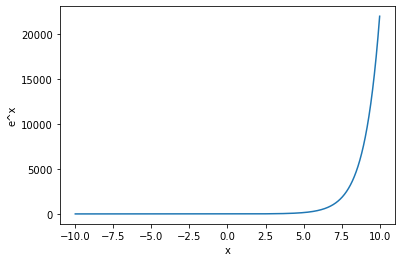

In [27]:
### START OF YOUR CODE ###
# GOAL: Plot any exponential curve #
import numpy as np
import matplotlib.pyplot as pt

x = np.linspace(-10, 10, 10000)

plt.plot(x, np.exp(x))
plt.ylabel("e^x")
plt.xlabel("x")


### END OF YOUR CODE ###
# There's no unique answer for this

# Submission

There's no need to submit anything because this lab isn't graded. Only even labs will be graded.

In [ ]:
### This is the end of the lab
### Referenced from COMP2211 Notes, NumPy official documentation, and stackoverflow